# Build makemore yay

In [ ]:
words = open('../names.txt').read().splitlines()
len(words)

32033

In [ ]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

The length of the smallest and largest word

In [ ]:
min(map(len, words)), max(map(len, words))

(2, 15)

An ostensibly small entry such as `isabella` packs quite a few examples to learn from:

* the character `i` is quite likely to come first in a sequence
* the character `s` is quite likely to come after the character `i`
* the character `a` is quite likely to come after the character `is`
* the character `b` is quite likely to come after the character `isa`
* ...
* the character `a` is quite likely to come after the character `isabell`
* after there is `isabella` the sequence is quite likely to end

So the fact that we have $32,033$ of them means we have quite a lot of structure to model.

## Bigram Model

In this we are given one character and we are going to predict the next character in the sequence. Thus, at any given time we are only going to be working with two characters.

In [ ]:
b = {} #keeps count of occurrences of a particular bigram
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(chs,chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1
#         print(ch1,ch2)

Examine the most frequently occurring bigrams.

In [ ]:
sorted(b.items(),key=lambda kv: kv[1], reverse=True)[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [ ]:
import torch

Instantiate a $28$ by $28$ array for holding the counts. $28$ because there are 26 characters in the English alphabet and we added two additional tokens.

In [ ]:
N = torch.zeros((28,28), 
                dtype=torch.int32 # since this will hold counts
               )

In [ ]:
chars = sorted(list(set(''.join(words))))
chars[:3], len(chars)

(['a', 'b', 'c'], 26)

In [ ]:
stoi = {s : i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [ ]:
itos = {v : k for k,v in stoi.items()}

In [ ]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
N[:5,:5]

tensor([[ 556,  541,  470, 1042,  692],
        [ 321,   38,    1,   65,  655],
        [ 815,    0,   42,    1,  551],
        [1303,    1,    3,  149, 1283],
        [ 679,  121,  153,  384, 1271]], dtype=torch.int32)

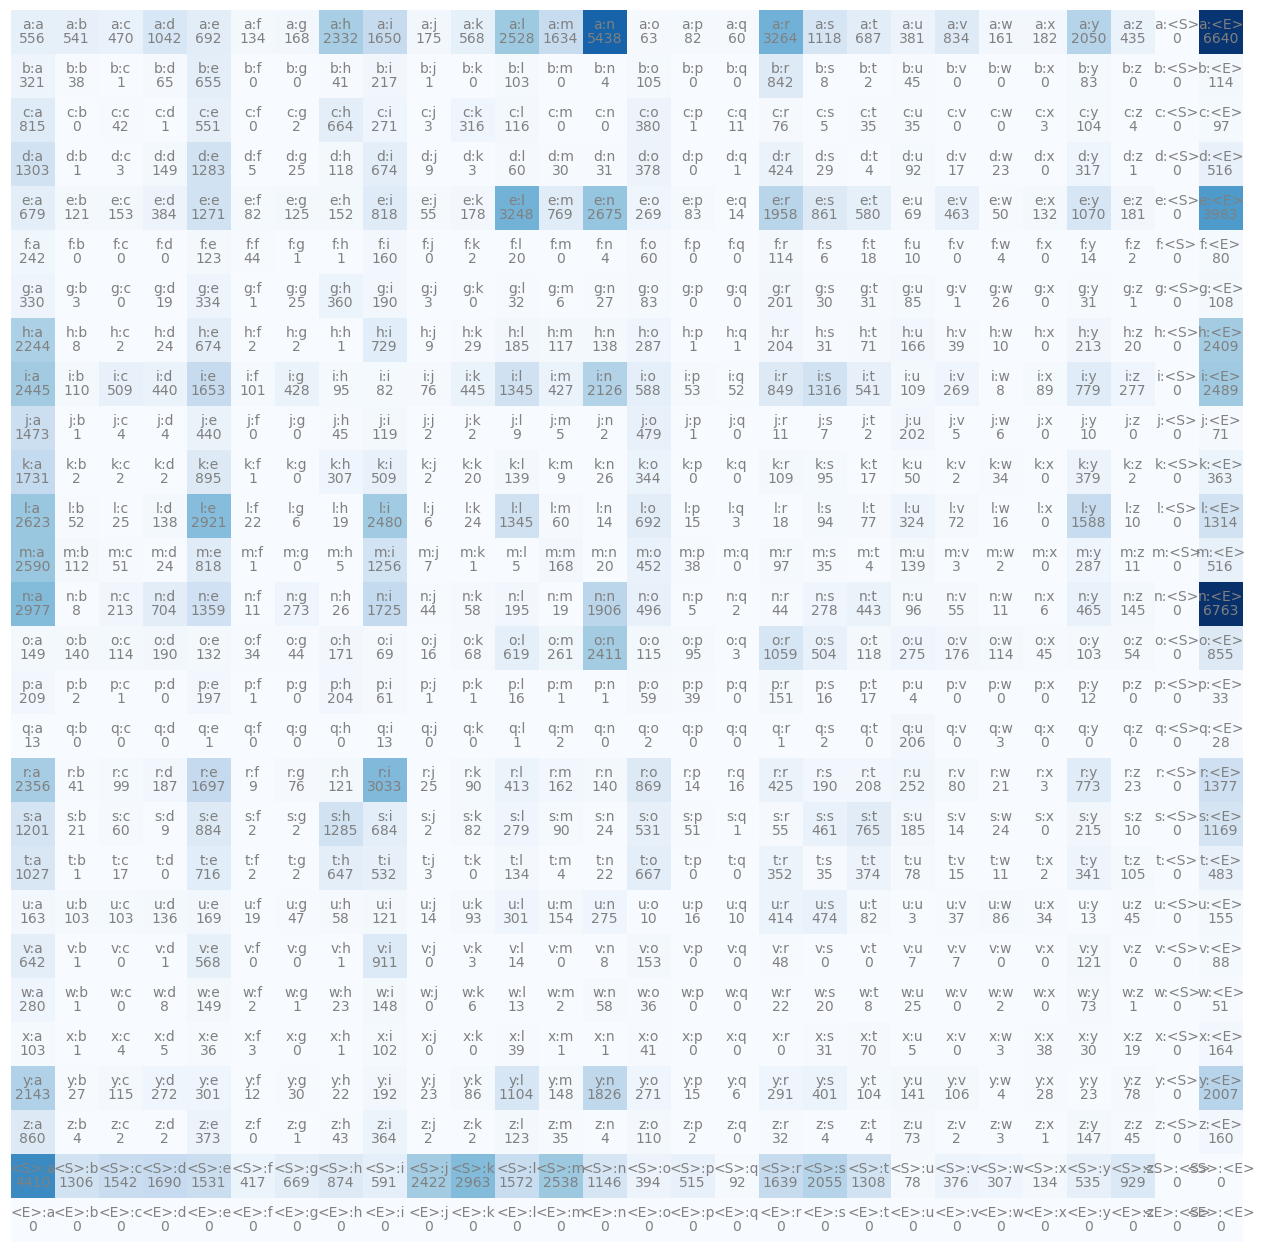

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + ':' + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i,j].item(), ha='center', va='top', color='gray')
plt.axis('off');        

#|hide

In case you are curious about why `i` and `j` appear to be interchanged in the calls to `plt.text`:

When we do an `imshow` on some matrix $m$ by $n$ matrix $K$ then:

* Consider the top edge of the figure, going from left to right, as the rows of the _figure_.
    * we will call this the Figure row below
    * Figure row `0` is upper left
    * Figure row `n-1` is upper right
* Consider the left edge of the figure, going from top to bottom, as the columns of the _figure_.
    * we will call this the Figure column below   
    * Figure row `0` is upper left
    * Figure row `m-1` is bottom left
* The `0`-th row and `0`-th column of `K` will be displayed on the upper left
* The `m-1`-th row and `n-1`-th column of `K` will be displayed on the bottom right at the `n-1`-th row and `m-1`-th column of the figure
* The $(i,j)$-th entry of `K` will be displayed at the figure row `j` and figure column `i`

So we consider the rows of the matrix as the columns of the figure and vice versa.

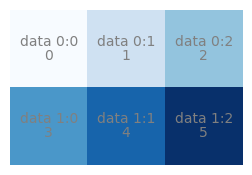

In [ ]:
#|hide
K = torch.arange(6).reshape((2,3))
plt.figure(figsize=(3,3))
plt.imshow(K, cmap='Blues')
for i in range(2):
    for j in range(3):
        chstr = f'data {i}:{j}'#itos[i] + ':' + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, K[i,j].item(), ha='center', va='top', color='gray')
plt.axis('off'); 